In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

In [2]:
nutrition = pd.read_csv("../data/Nutritional_values.csv")
nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [3]:
# I can see already some missing values
# Let's do some checking

In [4]:
# Shape
nutrition.shape

(8789, 77)

In [38]:
nutrition.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [39]:
for column, missing in nutrition.isnull().sum().iteritems():
    if missing > 0:
        print(f"Food property: {column}\nMissing values: {missing}")
        print('-' * 50)

Food property: saturated_fat
Missing values: 1590
--------------------------------------------------


In [40]:
# Well, I'm only missing values for the "saturated_fat" column.
# I could simply drop that column, although it is very interesting from a nutritional standpoint. I'll keep it at the moment to see if I can still take some advantage of it

In [41]:
# Next, I want to check if the serving size is the same for all the food. Otherwise, comparison wouldn't be reliable
nutrition["serving_size"].unique()

array(['100 g'], dtype=object)

In [42]:
# This also looks fine

In [43]:
# Let's have a look at the data types
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

In [44]:
# Well, surprise surprise, most of the column values are objects. Pain in the ass.
# It does make sense though, as many of the columns have the "mg" or "g" appended at the end

# Let's solve this using regex

In [45]:
# This regex looks fine
s = '0.00 mg'
re.match(r'[\d]*[\.\d]*', s)[0]

'0.00'

In [46]:
# Let's do some testing
# test = pd.DataFrame(index = nutrition.index)
# test["test"] = nutrition["saturated_fat"].map(lambda x: re.match(r'[\d]*[\.\d]*', x)[0])
# test

In [47]:
def num_cleaning(x):
    try:
        return re.match(r'[\d]*[\.\d]*', x)[0]
    except:
        return x

In [48]:
nutrition.set_index("name", inplace = True)

nutrition2 = pd.DataFrame(index = nutrition.index)

for column in nutrition.columns[2:]:
    if nutrition[column].dtype == "O":
        try:
            nutrition2[column] = nutrition[column].map(num_cleaning)
            print(column, "| success!!!")
        except:
            nutrition2[column] = nutrition[column]
            print(column, "| failed---")

nutrition2.head()

total_fat | success!!!
saturated_fat | success!!!
cholesterol | success!!!
sodium | success!!!
choline | success!!!
folate | success!!!
folic_acid | success!!!
niacin | success!!!
pantothenic_acid | success!!!
riboflavin | success!!!
thiamin | success!!!
vitamin_a | success!!!
vitamin_a_rae | success!!!
carotene_alpha | success!!!
carotene_beta | success!!!
cryptoxanthin_beta | success!!!
lutein_zeaxanthin | success!!!
vitamin_b12 | success!!!
vitamin_b6 | success!!!
vitamin_c | success!!!
vitamin_d | success!!!
vitamin_e | success!!!
tocopherol_alpha | success!!!
vitamin_k | success!!!
calcium | success!!!
copper | success!!!
irom | success!!!
magnesium | success!!!
manganese | success!!!
phosphorous | success!!!
potassium | success!!!
selenium | success!!!
zink | success!!!
protein | success!!!
alanine | success!!!
arginine | success!!!
aspartic_acid | success!!!
cystine | success!!!
glutamic_acid | success!!!
glycine | success!!!
histidine | success!!!
hydroxyproline | success!!!
is

,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.1,NaN,0,9.00,0.4,0.00,0.00,0.000,0.000,0.000,...,0.05,0.009,0.016,0.025,0.00,0.0,0.09,0.00,0.00,8.32
"Nuts, pecans",72,6.2,0,0.00,40.5,22.00,0.00,1.167,0.863,0.130,...,71.97,6.180,40.801,21.614,0.00,0.0,1.49,0.00,0.00,3.52
"Eggplant, raw",0.2,NaN,0,2.00,6.9,22.00,0.00,0.649,0.281,0.037,...,0.18,0.034,0.016,0.076,0.00,0.0,0.66,0.00,0.00,92.30
"Teff, uncooked",2.4,0.4,0,12.00,13.1,0,0,3.363,0.942,0.270,...,2.38,0.449,0.589,1.071,0,0,2.37,0,0,8.82
"Sherbet, orange",2,1.2,1,46.00,7.7,4.00,0.00,0.063,0.224,0.097,...,2.00,1.160,0.530,0.080,1.00,0.0,0.40,0.00,0.00,66.10


In [49]:
nutrition2.saturated_fat

name
Cornstarch                                                                                            NaN
Nuts, pecans                                                                                          6.2
Eggplant, raw                                                                                         NaN
Teff, uncooked                                                                                        0.4
Sherbet, orange                                                                                       1.2
                                                                                                     ... 
Beef, raw, all grades, trimmed to 0" fat, separable lean and fat, boneless, top round roast, round    1.4
Lamb, cooked, separable lean only, composite of trimmed retail cuts, frozen, imported, New Zealand    3.9
Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand     12
Beef, raw, all grades, trimmed to 0" fat,

In [50]:
# Now, let's transform the object data into numeric one

def to_float(x):
    try:
        return float(x)
    except:
        return x

In [51]:
nutrition3 = nutrition2.applymap(to_float)
nutrition3.head()

,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Teff, uncooked",2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
"Sherbet, orange",2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [52]:
nutrition3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8789 entries, Cornstarch to Beef, raw, all grades, trimmed to 0" fat, separable lean only, boneless, eye of round steak, round
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_fat                    8789 non-null   float64
 1   saturated_fat                7199 non-null   float64
 2   cholesterol                  8789 non-null   float64
 3   sodium                       8789 non-null   float64
 4   choline                      8789 non-null   float64
 5   folate                       8789 non-null   float64
 6   folic_acid                   8789 non-null   float64
 7   niacin                       8789 non-null   float64
 8   pantothenic_acid             8789 non-null   float64
 9   riboflavin                   8789 non-null   float64
 10  thiamin                      8789 non-null   float64
 11  vitamin_a                    8789 no

In [84]:
macros = ["protein", "carbohydrate", "fat", "alcohol"]
micros = ["vitamin_a", "vitamin_b12", "vitamin_b6", "vitamin_c", "vitamin_e", "magnesium", "zinc", "calcium", "irom", "potassium"]
others = ["fiber", "sugars", "cholesterol"]
fats = ["total_fat", "saturated_fat", "saturated_fatty_acids", "monounsaturated_fatty_acids", "polyunsaturated_fatty_acids"]

In [53]:
# After reading the documentation, I think that some of these columns could be full of 0s, so I'll just drop those if that's the case

In [54]:
nutrition3_stats = nutrition3.describe().T
nutrition3_stats

,count,mean,std,min,25%,50%,75%,max
total_fat,8789.0,10.556855,15.818247,0.0,1.00,5.10,14.00,100.0
saturated_fat,7199.0,4.192791,6.877009,0.1,0.70,2.20,5.00,96.0
cholesterol,8789.0,38.723063,117.358944,0.0,0.00,2.00,65.00,3100.0
sodium,8789.0,306.353851,939.220468,0.0,36.00,84.00,396.00,38758.0
choline,8789.0,23.681249,51.332265,0.0,0.00,1.60,29.40,2403.3
...,...,...,...,...,...,...,...,...
alcohol,8789.0,0.117522,1.600127,0.0,0.00,0.00,0.00,42.5
ash,8789.0,1.717408,2.967751,0.0,0.77,1.17,2.02,99.8
caffeine,8789.0,2.608829,82.070233,0.0,0.00,0.00,0.00,5714.0
theobromine,8789.0,4.695642,60.962608,0.0,0.00,0.00,0.00,2634.0


In [55]:
nutrition3_stats[nutrition3_stats["mean"] < 0.1]

,count,mean,std,min,25%,50%,75%,max
hydroxyproline,8789.0,0.025559,0.077800,0.0,0.0,0.000,0.00,1.13
tryptophan,8789.0,0.095344,0.127419,0.0,0.0,0.021,0.19,1.60
galactose,8789.0,0.004852,0.078666,0.0,0.0,0.000,0.00,5.62
maltose,8789.0,0.071506,0.439321,0.0,0.0,0.000,0.00,10.04


In [56]:
nutrition3_stats[nutrition3_stats["max"] < 0.1]

,count,mean,std,min,25%,50%,75%,max


In [57]:
# Well, it seems like columns where actually ok and with info

In [58]:
nutrition3.head()

,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Teff, uncooked",2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
"Sherbet, orange",2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


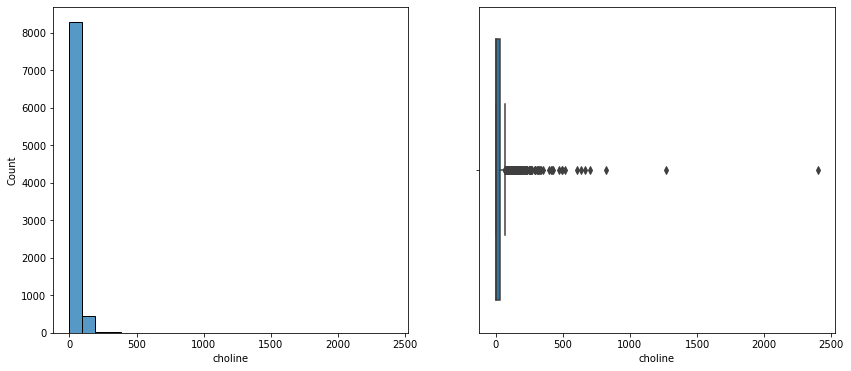

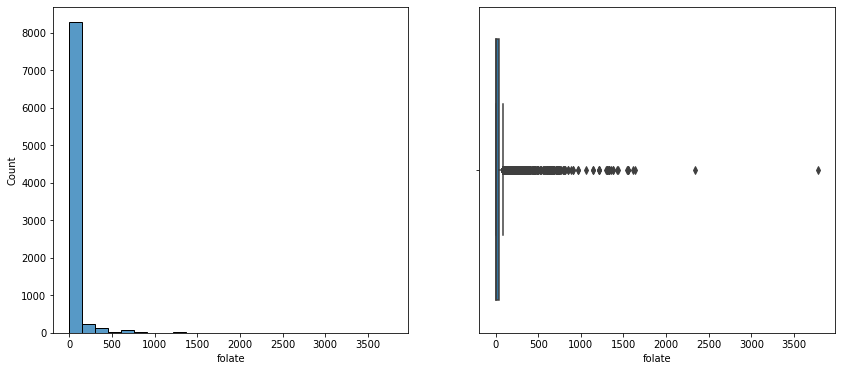

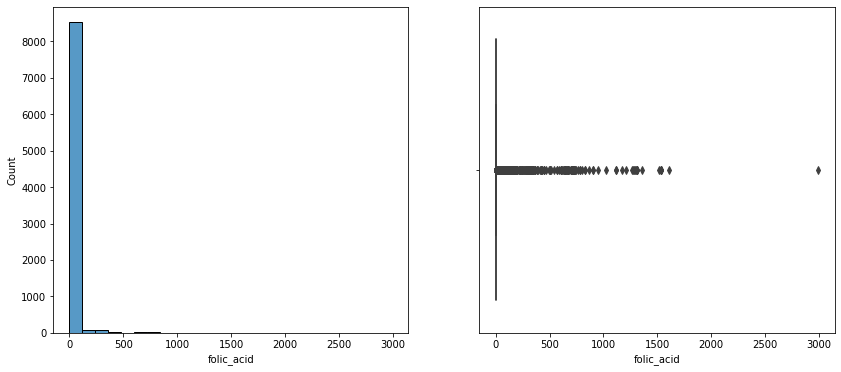

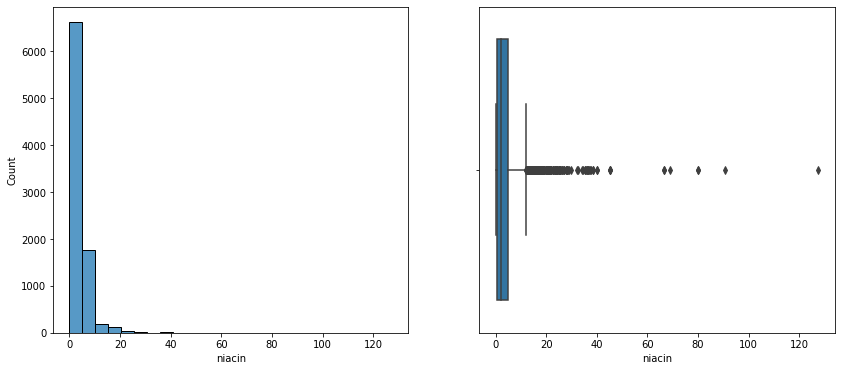

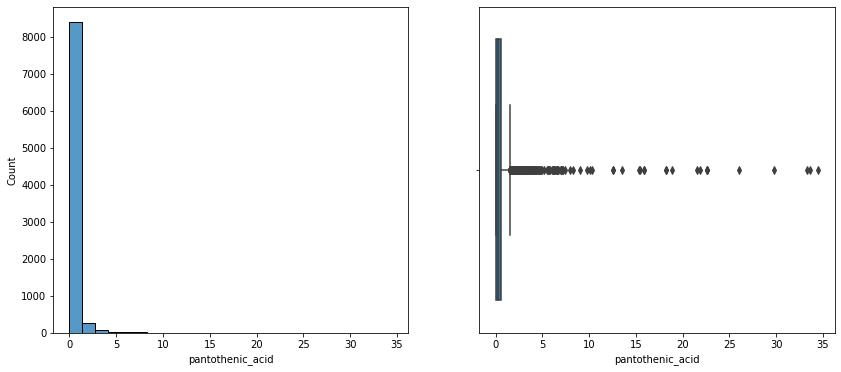

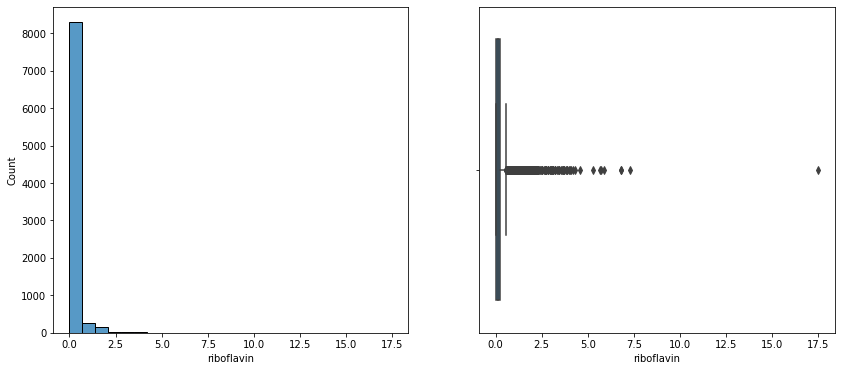

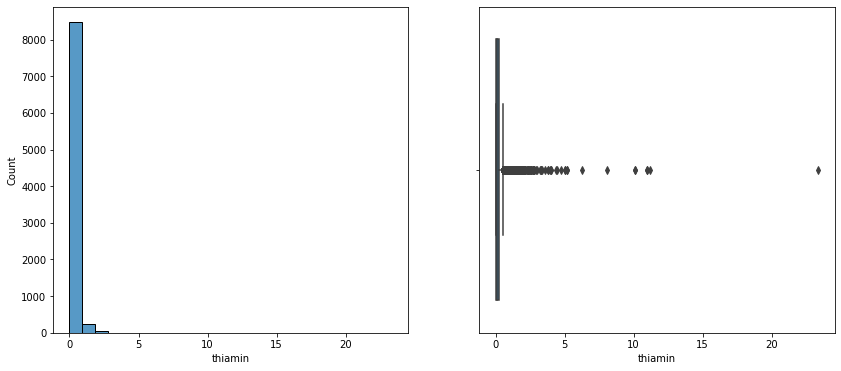

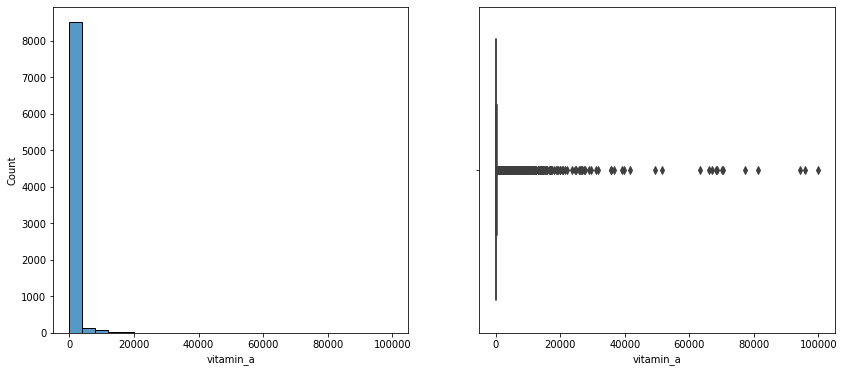

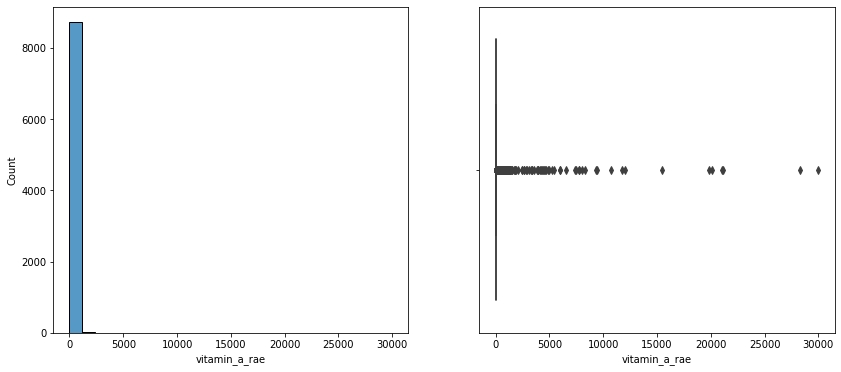

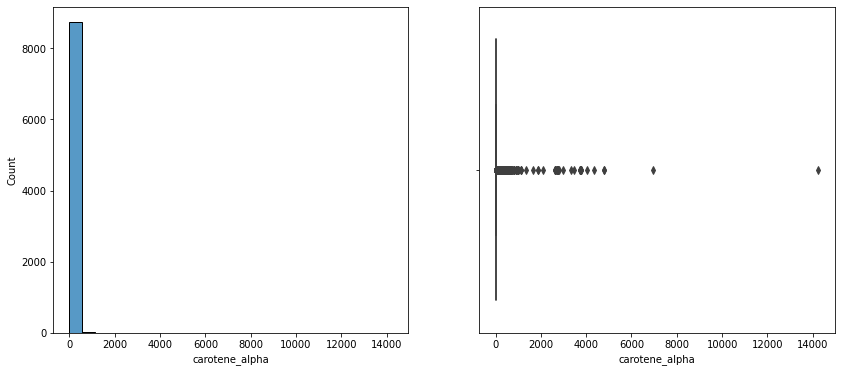

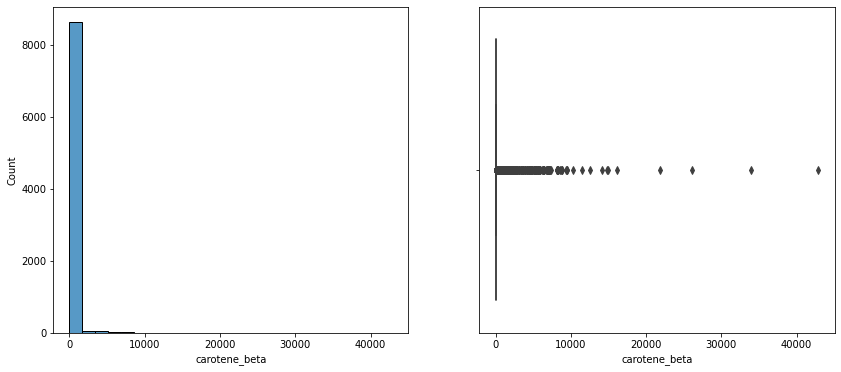

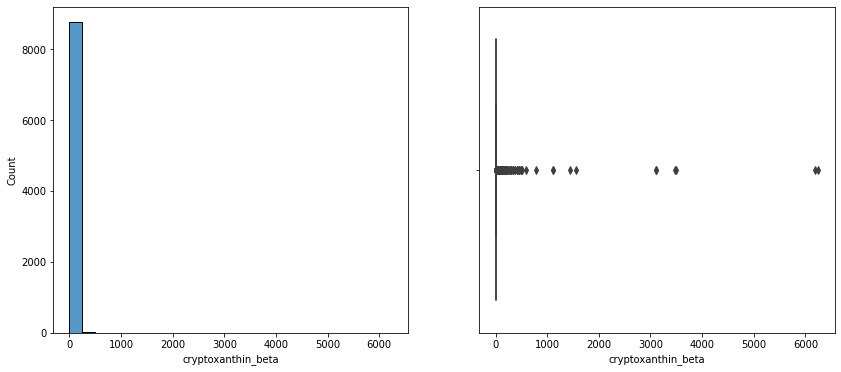

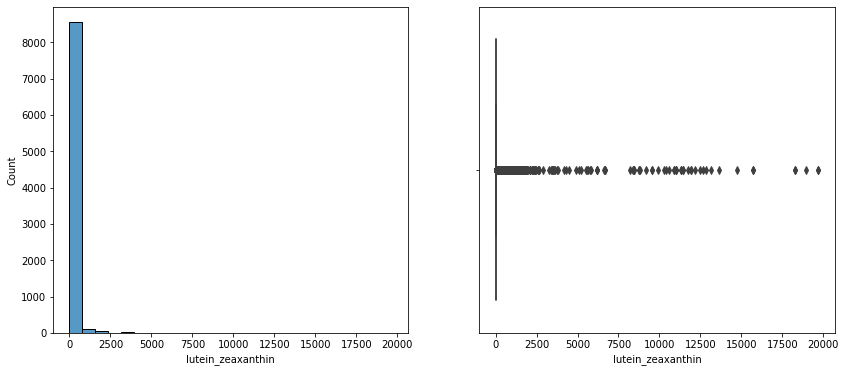

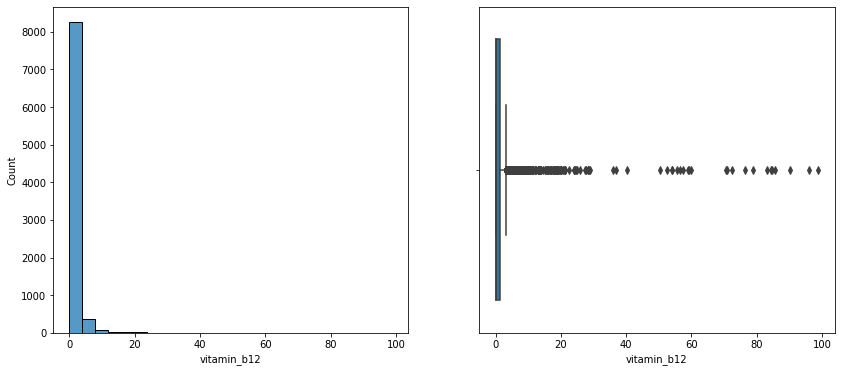

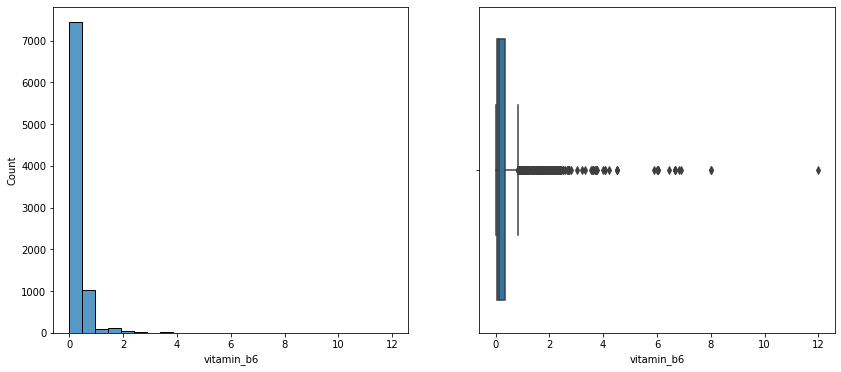

In [28]:
for column in nutrition3.columns[4:19]:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
        sns.histplot(nutrition3[column], bins = 25, ax = ax1)
        sns.boxplot(x = column, data = nutrition3, ax = ax2)

In [60]:
nutrition3[nutrition3["carbohydrate"] > 0][["total_fat", "protein", "carbohydrate", "fiber"]].sort_values(by = "protein", ascending = False).head(20)

,total_fat,protein,carbohydrate,fiber
name,,,,
"Soy protein isolate, potassium type",0.5,88.32,2.59,0.0
"Egg, glucose reduced, stabilized, dried, white",0.3,84.08,4.51,0.0
"Egg, glucose reduced, stabilized, powder, dried, white",0.0,82.40,4.47,0.0
"Egg, dried, white",0.0,81.10,7.80,0.0
"Beverages, Protein powder whey based",1.6,78.13,6.25,3.1
"Egg, glucose reduced, stabilized, flakes, dried, white",0.0,76.92,4.17,0.0
Vital wheat gluten,1.9,75.16,13.79,0.6
"Beverages, EAS whey protein powder, ABBOTT",5.1,66.67,17.95,0.0
"Soy protein concentrate, produced by acid wash",0.5,63.63,25.41,5.5


In [61]:
nutrition3[(nutrition3["protein"] > 30) & (nutrition3["carbohydrate"] > 5)][["total_fat", "protein", "carbohydrate", "fiber"]].sort_values(by = "protein", ascending = False).head(60)

,total_fat,protein,carbohydrate,fiber
name,,,,
"Egg, dried, white",0.0,81.10,7.80,0.0
"Beverages, Protein powder whey based",1.6,78.13,6.25,3.1
Vital wheat gluten,1.9,75.16,13.79,0.6
"Beverages, EAS whey protein powder, ABBOTT",5.1,66.67,17.95,0.0
"Soy protein concentrate, produced by alcohol extraction",0.5,63.63,25.41,5.5
"Soy protein concentrate, produced by acid wash",0.5,63.63,25.41,5.5
"Beverages, Whey protein powder isolate",1.2,58.14,29.07,0.0
"Seaweed, dried, spirulina",7.7,57.47,23.90,3.6
"Beverages, Protein powder soy based",5.6,55.56,28.89,6.7


In [62]:
# I can see from the data that it also includes beverages, shakes, supplements, and so on...
# As I'm actually interested in the raw food, I'll do some cleaning here

In [63]:
nutrition3["supplement"] = nutrition3.index.str.contains("supplement")
nutrition3.head()

,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,...,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,supplement
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,...,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32,False
"Nuts, pecans",72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,...,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,False
"Eggplant, raw",0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,...,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30,False
"Teff, uncooked",2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,...,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,False
"Sherbet, orange",2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,...,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,False


In [64]:
nutrition3[nutrition3.index.str.contains("supplement")]

,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,...,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,supplement
name,,,,,,,,,,,,,,,,,,,,,
"Protein supplement, powder, Muscle Milk, milk based",17.0,1.6,21.0,329.0,81.6,200.0,200.0,10.000,5.714,0.857,...,1.553,12.105,1.770,21.0,0.0,3.65,0.0,0.0,15.00,True
"Protein supplement, powder, Muscle Milk Light, milk based",12.0,1.1,10.0,250.0,81.6,280.0,280.0,14.000,8.000,1.200,...,1.087,8.474,1.239,10.0,0.0,4.00,0.0,0.0,12.00,True
"Beverages, peanut flavor, canned, Meal supplement drink",3.1,0.6,0.0,54.0,0.0,0.0,0.0,6.600,1.700,1.300,...,0.571,1.922,0.178,0.0,0.0,0.90,0.0,0.0,77.79,True
"Nutritional supplement for people with diabetes, liquid",3.1,0.2,2.0,92.0,60.5,44.0,44.0,2.201,1.100,0.187,...,0.232,2.318,0.395,2.0,0.0,0.90,2.0,23.0,79.74,True


In [65]:
nutrition3["Beverages"] = nutrition3.index.str.contains("Beverages")

In [68]:
nutrition3[nutrition3["Beverages"] == True].index

Index(['Beverages, orange, carbonated', 'Beverages, hard cider, AMBER',
       'Beverages, powder, Cocoa mix', 'Beverages, AMP, Energy drink',
       'Beverages, well, tap, water', 'Beverages, powder, Lemonade',
       'Beverages, chocolate syrup', 'Beverages, cola, ZEVIA',
       'Beverages, Cran Grape, OCEAN SPRAY',
       'Beverages, tonic water, carbonated',
       ...
       'Beverages, vitamin A and vitamin D,  added calcium, Ready-to-drink, flavored and sweetened, reduced fat, milk beverage',
       'Beverages, fortified with vitamins B6 and B12, sugar-free with guarana, energy drink, NOS Zero, THE COCA-COLA COMPANY',
       'Beverages, vitamins B6 and B12, pantothenic acid, niacin, with added caffeine, sugar free, RED BULL, Energy drink',
       'Beverages, prepared with water and ice, powder, with aspartame, reduced calorie, chocolate, dairy drink mix',
       'Beverages, added calcium, high vitamin C, greater than 3% fruit juice, reduced sugar, Fruit flavored drink',
       '

In [82]:
nutrition3["total_fat"].sort_values(ascending = False)

name
Oil, walnut                                    100.0
Oil, whale (Alaska Native), beluga             100.0
Oil, (approx. 65%), linoleic, sunflower        100.0
Oil, salad or cooking, peanut                  100.0
Oil, linoleic (less than 60%), sunflower       100.0
                                               ...  
Bread, toasted, sprouted, wheat                  0.0
Carbonated beverage, cream soda                  0.0
Beverages, Malt liquor beverage                  0.0
Alcoholic Beverage, Syrah, red, table, wine      0.0
Alcoholic beverages, rose, wine                  0.0
Name: total_fat, Length: 8789, dtype: float64

In [102]:
macros = ["protein", "carbohydrate", "fat", "alcohol"]
micros = ["vitamin_a", "vitamin_b12", "vitamin_b6", "vitamin_c", "vitamin_e", "magnesium", "zink", "calcium", "irom", "potassium"]
others = ["fiber", "sugars", "cholesterol"]
fats = ["total_fat", "saturated_fat", "saturated_fatty_acids", "monounsaturated_fatty_acids", "polyunsaturated_fatty_acids"]

l = [macros, micros, others, fats]
full_column_filter = []

for i in l:
    full_column_filter.extend(i)


In [103]:
full_column_filter

['protein',
 'carbohydrate',
 'fat',
 'alcohol',
 'vitamin_a',
 'vitamin_b12',
 'vitamin_b6',
 'vitamin_c',
 'vitamin_e',
 'magnesium',
 'zink',
 'calcium',
 'irom',
 'potassium',
 'fiber',
 'sugars',
 'cholesterol',
 'total_fat',
 'saturated_fat',
 'saturated_fatty_acids',
 'monounsaturated_fatty_acids',
 'polyunsaturated_fatty_acids']

In [97]:
others

['fiber', 'sugars', 'cholesterol']